Please **submit this Jupyter notebook through Canvas** no later than **Monday November 5 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Tharangni H Sivaji (11611065)

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

from scipy.sparse import diags
from prettytable import PrettyTable

np.random.seed(123)

-----
# Exercise 1
Compute a solution to the equation

$$ 600 x^4 - 550 x^3 + 200 x^2 - 20 x - 1 = 0, \quad x \in [0.1, 1.0], $$

using each of the following methods.

In [2]:
def f(x):
    y = 600*x**4 - 550*x**3 + 200*x**2 - 20*x - 1
    return y

In [3]:
def f_x(x):
    y = 2400*x**3 - 1650*x**2 + 400*x -20
    return y

## (a)
Using the interval bisection method.

In [4]:
def interval_bisection(a, b, tol):
    
    print("Interval Bisection: \na: {}, b: {}".format(a, b))

    t = PrettyTable(['k', 'a', 'f(a)', 'b', 'f(b)'])
    c = 0.0
    k = np.ceil(np.log2((b-a)/tol))
    data = {}

    while((b-a) > tol):
           
        t.add_row([c, a, f(a), b, f(b)])
        #data[c] = a
        data[c] = b
        m = a + (b-a)/2
             
        if (np.sign(f(a)) == np.sign(f(m))):
            a = m
        else:
            b = m

        c = c + 1
    
    print(t)
    print("\nNumber of iterations observed for tol {} is: {}".format(tol, c))    
    print("Number of iterations required for tol {} is: {}".format(tol, k))
    return data

In [5]:
bisect = interval_bisection(0.1, 1.0, 1e-5)

Interval Bisection: 
a: 0.1, b: 1.0
+------+---------------------+------------------------+---------------------+-----------------------+
|  k   |          a          |          f(a)          |          b          |          f(b)         |
+------+---------------------+------------------------+---------------------+-----------------------+
| 0.0  |         0.1         |  -1.4899999999999998   |         1.0         |         229.0         |
| 1.0  |         0.1         |  -1.4899999999999998   |         0.55        |        11.8975        |
| 2.0  |         0.1         |  -1.4899999999999998   | 0.32500000000000007 |   1.438515624999999   |
| 3.0  | 0.21250000000000002 |  -0.2729345703124988   | 0.32500000000000007 |   1.438515624999999   |
| 4.0  | 0.21250000000000002 |  -0.2729345703124988   | 0.26875000000000004 |   0.5243295288085932  |
| 5.0  | 0.21250000000000002 |  -0.2729345703124988   | 0.24062500000000003 |  0.11629644393920824  |
| 6.0  | 0.22656250000000003 |  -0.08051028847

## (b)
Using newton's method.

In [6]:
def newton_method(x0, tol):
    
    print("Newton method: \nx0: {}".format(x0))
    t = PrettyTable(['k', 'x_k' ,'f(x_k)', 'f`(x_k) ', 'h_k'])
    h_k = -f(x0)/f_x(x0)
    k = 0
    data = {}

    while ( abs(f(x0)) > tol and abs(h_k)/abs(f(x0)) > tol ):
        
        h_k = -f(x0)/f_x(x0)
        x1 = x0 + h_k

        t.add_row([k, x0, f(x0), f_x(x0), h_k])
        data[k] = x0

        x0 = x1
        k = k+1
        
    print(t)
    print("\nNumber of iterations required for tol {} is: {}".format(tol, k))
    return data

In [7]:
newton = newton_method(1, 1e-4)

Newton method: 
x0: 1
+---+---------------------+-----------------------+--------------------+------------------------+
| k |         x_k         |         f(x_k)        |      f`(x_k)       |          h_k           |
+---+---------------------+-----------------------+--------------------+------------------------+
| 0 |          1          |          229          |        1130        |  -0.20265486725663717  |
| 1 |  0.7973451327433628 |   73.91309836600178   | 466.5421980224505  |  -0.15842746632416088  |
| 2 |  0.638917666419202  |   24.39992755239094   | 187.97008557478358 |  -0.12980750355983356  |
| 3 |  0.5091101628593684 |   8.388255233507152   | 72.67424459052648  |   -0.115422668385061   |
| 4 |  0.3936874944743074 |   2.9776699943754794  | 28.183907727456415 |  -0.1056514243223508   |
| 5 |  0.2880360701519566 |   0.8188600501022085  | 15.674981318926982 | -0.052239937862858195  |
| 6 |  0.2357961322890984 |  0.04822241526860882  | 14.043288278016568 | -0.0034338407297453562 

## (c)
Using the secant method.

In [8]:
def secant_method(x0, x1, tol):
    
    print("Secant method: \nx0: {}, x1: {}".format(x0, x1))
    t = PrettyTable(['k', 'x_k' ,'f(x_k)', 'h_k'])
    k = 0
    h_k = 1
    data = {}
    
    while ( abs(f(x1)) > tol ):
        
        h_k = - f(x1)*(x1 - x0)/(f(x1) - f(x0))
        x2 = x1 + h_k
        t.add_row([k, x1, f(x1), h_k])
        data[k] = x1
        
        x0 = x1
        x1 = x2
        k = k+1
        
    print(t)
    print("\nNumber of iterations required for tol {} is: {}".format(tol, k))    
    return data

In [9]:
secant = secant_method(3, 1, 1e-5)

Secant method: 
x0: 3, x1: 1
+----+---------------------+-----------------------+-------------------------+
| k  |         x_k         |         f(x_k)        |           h_k           |
+----+---------------------+-----------------------+-------------------------+
| 0  |          1          |          229          |  -0.012989222915484969  |
| 1  |  0.987010777084515  |   214.68088864602456  |   -0.19474238654785206  |
| 2  |  0.792268390536663  |   71.57464090255063   |   -0.09740047416136557  |
| 3  |  0.6948679163752974 |   37.021371972520804  |   -0.10435768585397061  |
| 4  |  0.5905102305213268 |   16.63448974884675   |   -0.08514969756068957  |
| 5  |  0.5053605329606372 |   8.119838805307314   |   -0.08120142834957618  |
| 6  | 0.42415910461106104 |   3.948800035814795   |   -0.07687490356605614  |
| 7  |  0.3472842010450049 |   1.866541848801866   |   -0.06891087067089083  |
| 8  | 0.27837333037411405 |   0.6694606485333914  |   -0.03853800073043398  |
| 9  | 0.23983532964368

## (d)
Compare the speed of convergence you observe for the three methods. Plot your results and briefly explain.

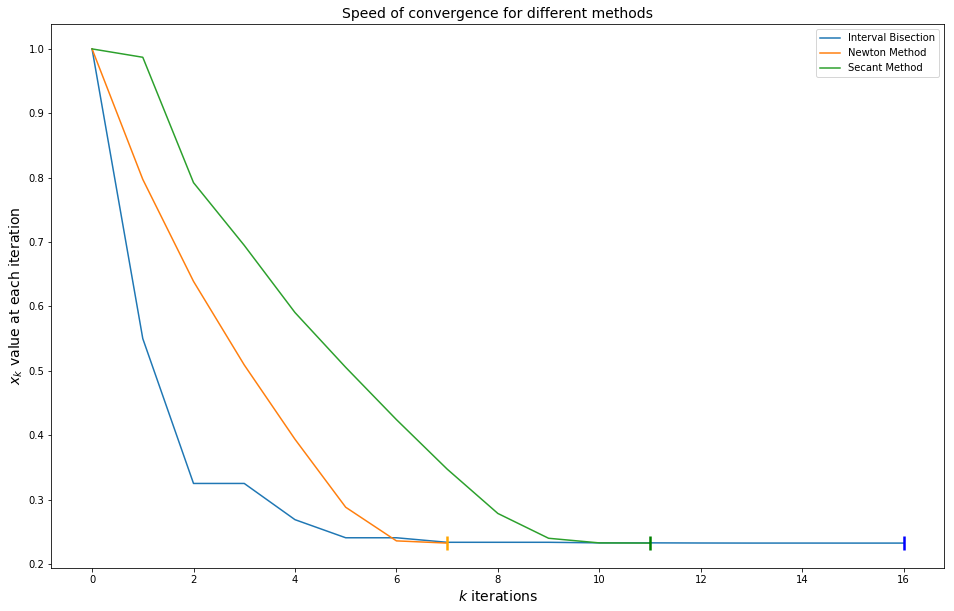

In [10]:
plt.rcParams["figure.figsize"] = (16, 10)
plt.plot(bisect.keys(), bisect.values(), label = "Interval Bisection")
plt.plot(len(bisect)-1, bisect[len(bisect)-1], "b|", markersize = 14, markeredgewidth = 2.5)
plt.plot(newton.keys(), newton.values(), label = "Newton Method")
plt.plot(len(newton)-1, newton[len(newton)-1], "|", color="orange", markersize = 14, markeredgewidth = 2.5)
plt.plot(secant.keys(), secant.values(), label = "Secant Method")
plt.plot(len(secant)-1, secant[len(secant)-1], "g|", markersize = 14, markeredgewidth = 2.5)
plt.xlabel(r'$k$ iterations', fontsize = 14)
plt.ylabel(r'$x_k$ value at each iteration', fontsize = 14)
plt.title(r'Speed of convergence for different methods', fontsize = 14)
plt.legend() 
plt.show()

All the three methods have the same starting point ($x_k = 1$) for uniform comparison. It can be seen that Newton method converges the fastest. Reasons for this are as follows:

1. **Interval Bisection** : It takes the longest time to converge since it doesn't take the magnitude of the function value but rather only the sign for updating in the next iteration.
2. **Newton Method** : It is so far the fastest method for convergence. It has a quaratic convergence rate. This means that the number of correct digits in the approximate solution is doubled at each iteration. 
3. **Secant Method** : The approximate solution produced by the secant method depends on the previous two iterates and thereby its convergence behaviour is somewhat complicated (hence a bit slower than Newton). It has a convergence rate of $\approx 1.618$ and is superlinearly convergent. 

--------
# Exercise 2
Consider the following boundary value problem involving a nonlinear ordinary differential equation:

$$y''(x) + \exp(y(x)) = 0, \quad 0 < x < 1, \quad y(0) = y(1) = 0.$$

We can approximate the solution by discretizing the differential equation and solving the resulting system of nonlinear equations. Suppose we use $n+2$ discretization points for $x$ (denoted $x_k = kh$ for $k \in \{0, \ldots, n+1\}$ and $h = 1/(n+1)$, the approximate solution is denoted $y_k = y(x_k)$.

We will use a _central finite difference_ approximation for the second derivative: 

$$y''(t_k) \approx (y_{k+1} - 2 y_k + y_{k-1})/h^2.$$

From the boundary values, we conclude that $y_0 = y_{n+1} = 0$. The result is a set of $n$ nonlinear equations

$$ \frac{y_{k+1} + y_{k-1} - 2 y_k}{h^2} + \exp y_k = 0, \quad k = 1, \ldots, n.$$

## (a)
Write this set of equations as $\mathbf{f}(\mathbf x) = \mathbf{0}$, where $\mathbf f$ is a function from $\mathbf x \in \mathbb R^{n}$ to $\mathbf f(\mathbf x) \in \mathbb R^{n}$. What is $\mathbf x$, and what is $\mathbf f$?

$$
\mathbf{x} = 
\begin{bmatrix}
y_1\\ 
y_2\\ 
\vdots \\
y_{n-1} \\
y_n
\end{bmatrix}
% \begin{bmatrix}
% 1\\ 
% 2\\ 
% \vdots \\
% {n-1} \\
% n
% \end{bmatrix}
$$

From the equation given above,

At k = 1, 

$y_2 + y_0 - 2y_1 + h^2 e^{y_1} = 0$

$\Rightarrow y_2 - 2y_1 + h^2 e^{y_1} = 0$

At k = 2, 

$y_3 + y_1 - 2y_2 + h^2 e^{y_2} = 0$

$\vdots$

At k = n-1,

$y_n + y_{n-2} - 2y_{n-1} + h^2 e^{y_{n-1}} = 0$

At k = n,

$y_{n+1} + y_{n-1} - 2y_{n} + h^2 e^{y_{n}} = 0$

$\Rightarrow y_{n-1} - 2y_{n} + h^2 e^{y_{n}} = 0$

Taking only the co-efficents of these n equations to form the $\mathbf{f}$ matrix,

$$
\mathbf{f} = 
\begin{bmatrix}
-2y_1 +h^2 e^{y_1} & 1 & 0 & \cdots & \cdots & \cdots & \cdots\\ 
1 & -2y_2 +h^2 e^{y_2} & 1 & 0 & \cdots & \cdots & \cdots\\ 
0 & 1 & -2y_3 +h^2 e^{y_3} & 1 & 0 & \cdots & \cdots\\ 
\vdots & \vdots  & \ddots & \ddots & \ddots & \cdots & \cdots\\ 
\vdots & \vdots  & \vdots & \ddots & \ddots & \ddots & \cdots \\ 
0 & 0 & 0 & \cdots & 1 & -2y_{n-1} +h^2 e^{y_{n-1}} & 1\\ 
0 & 0 & 0 & \cdots & 0 & 1 & -2y_{n} +h^2 e^{y_{n}} 
\end{bmatrix}
$$

$$ \therefore \mathbf{f(x)} = 
\begin{bmatrix}
f(x_1)\\ 
f(x_2)\\ 
\vdots \\
f(x_{n-1}) \\
f(x_n)
\end{bmatrix} = 
\begin{bmatrix}
y_2 - 2y_1 + h^2 e^{y_1}\\ 
y_3 + y_1 - 2y_2 + h^2 e^{y_2}\\ 
\vdots \\ 
y_n + y_{n-2} - 2y_{n-1} + h^2 e^{y_{n-1}}\\ 
 y_{n-1} - 2y_{n} + h^2 e^{y_{n}}
\end{bmatrix} = 0
$$

**NOTE:** From the above analysis, we get $n$ coupled equations which can be solved for the $n$ unknowns and the solution vector is given by $\mathbf{f(x)}$.

In [11]:
def x_vec(yk):
    '''
    The first and last indices have 0 value in order to account for y_0
    and y_{n+1} = 0 conditions.
    '''
    
    n = yk.shape[0]    
    x = np.zeros((n+2, 1))

    for i in range(n+2):
        if(i == n+1 or i == 0):
            x[i] = 0
        else:
            x[i] = yk[i-1]                
    return x

In [12]:
x = x_vec(np.array([0, 0, 0, 0]))

In [13]:
np.array([0, 0, 0, 0])

array([0, 0, 0, 0])

In [14]:
def bvp_f(x):
    '''
    Returns f(x) vector as defined above
    '''
    
    n = x.shape[0] - 2
    h = 1/(n+1)
    fx = np.zeros((n, 1))
    
    for i in range(1, n+1):
        y_kminus = x[i-1]
        y_k = x[i]
        y_kplus = x[i+1]
        
        fx[i-1] = y_kplus + y_kminus - 2*y_k + (h**2)*np.exp(y_k)
    return fx

In [15]:
bvp_f(x)

array([[0.04],
       [0.04],
       [0.04],
       [0.04]])

## (b)
What is the Jacobian corresponding to this set of equations?

$$
\mathbf{J} = 
\begin{bmatrix}
\cfrac{\partial f(x_1)}{\partial x_1} & \cdots & \cdots & \cfrac{\partial f(x_1)}{\partial x_n}\\ 
\vdots & \cdots & \cdots & \vdots\\  
\vdots & \cdots & \cdots & \vdots\\ 
\cfrac{\partial f(x_n)}{\partial x_1} & \cdots & \cdots & \cfrac{\partial f(x_n)}{\partial x_n} 
\end{bmatrix}
$$

$$
\mathbf{J_f} = 
\begin{bmatrix}
-2 + h^2 e^{y_1} & 1 & 0 & \cdots & \cdots & \cdots & 0\\ 
1 & -2 + h^2 e^{y_2} & 1 & 0 & \cdots & \cdots & 0\\ 
0 & 1 & -2 + h^2 e^{y_3} & 1  & 0 & \cdots & 0\\ 
\vdots & \vdots  & \ddots & \ddots & \ddots & \cdots & \vdots\\ 
\vdots & \vdots  & \ddots & \ddots & \ddots & \cdots & 0\\ 
0 & \cdots & \cdots & \cdots & 1 & -2 + h^2 e^{y_{n-1}} & 1\\ 
0 & \cdots & \cdots & \cdots & \cdots & 1 & -2 + h^2 e^{y_n} 
\end{bmatrix}
$$

In [16]:
def bvp_J(x):
    '''
    Returns the jacobian matrix as defined above
    '''
    
    n = x.shape[0] - 2
    h = 1/(n+1)
    main_dia = np.eye(n)
    
    for i in range(n):
        y_k = x[i+1]
        main_dia[i, i] = 2*y_k + (h**2)*np.exp(y_k)
    
    diagonals = [np.diagonal(main_dia), [1], [1]]
    J = diags(diagonals, [0, 1, -1]).toarray()
    
    return J

In [17]:
bvp_J(x)

array([[0.04, 1.  , 0.  , 0.  ],
       [1.  , 0.04, 1.  , 0.  ],
       [0.  , 1.  , 0.04, 1.  ],
       [0.  , 0.  , 1.  , 0.04]])

In [18]:
x[1:5]

array([[0.],
       [0.],
       [0.],
       [0.]])

## (c)
Using Newton's method, solve the system of equations. Try various initial guesses, including zero (i.e., $y_k = 0$ for all $k$). Show the solutions you find, and discuss the convergence that you observe.

In [19]:
def newton_nonlinear(y_k, message = 1):
    
    k = 0
    eps_mach = 2**52 #overflow limit in machines
    
    k_list = []
    soln_list = []
    
    x0 = x_vec(y_k)
    N = x0.shape[0]
    f_norm = np.linalg.norm(bvp_f(x0), 2)

    while(abs(f_norm) < eps_mach/2): #divide by 2 for further numerical stability (due to exp)

        x = x0[1:N-1]
        
        k_list.append(k)
#         soln_list.append(np.sort(x, axis=None))
        soln_list.append(x)
        
        f_x0 = bvp_f(x0)
        J_x0 = bvp_J(x0)
        
        x1 = x - np.linalg.solve(J_x0, f_x0) 
        f_norm = np.linalg.norm(f_x0, 2)
        
        k = k+1
        x0 = x_vec(x1)
    
    soln_matrix = np.squeeze(np.stack(soln_list, axis=0))
    
    if(message):
        print("Number of iterations taken for convergence with starting vector: {} is {}".format(x_vec(y_k)[1:N-1].T, k))

    return k_list, soln_matrix
#     return k, x1

In [20]:
m = 24
k0, sol0 = newton_nonlinear(np.zeros((m,)), 1)
k1, sol1 = newton_nonlinear(np.ones((m,)), 1)
k2, sol2 = newton_nonlinear(np.ones((m,))*2, 1)
k3, sol3 = newton_nonlinear(np.ones((m,))*3, 1)
k4, sol4 = newton_nonlinear(np.ones((m,))*4, 1)
k5, sol5 = newton_nonlinear(np.ones((m,))*5, 1)
k6, sol6 = newton_nonlinear(np.ones((m,))*6, 1)

Number of iterations taken for convergence with starting vector: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] is 21
Number of iterations taken for convergence with starting vector: [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]] is 21
Number of iterations taken for convergence with starting vector: [[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]] is 8
Number of iterations taken for convergence with starting vector: [[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]] is 11
Number of iterations taken for convergence with starting vector: [[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]] is 36
Number of iterations taken for convergence with starting vector: [[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]] is 33
Number of iterations taken for convergence with starting vector: [[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6

In [21]:
sol0

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.55094933e-05, -1.60002482e-03, -1.61294945e-03,
         2.60553432e-06,  1.29452848e-05, -1.60262625e-03,
        -1.61038108e-03,  5.20285650e-06,  1.03727582e-05,
        -1.60521945e-03, -1.60780441e-03,  7.79193997e-06,
         7.79193997e-06, -1.60780441e-03, -1.60521945e-03,
         1.03727582e-05,  5.20285650e-06, -1.61038108e-03,
        -1.60262625e-03,  1.29452848e-05,  2.60553432e-06,
        -1.61294945e-03, -1.60002482e-03,  1.55094933e-05],
       [-1.94025621e-02, -1.53733410e-03,  1.46051710e

In [22]:
sol1

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.90269065e+00,  1.86343429e-01,  1.72381204e+00,
         3.58535197e-01,  1.55755821e+00,  5.19574181e-01,
         1.40103367e+00,  6.72265024e-01,  1.25151243e+00,
         8.19266977e-01,  1.10639042e+00,  9.63140214e-01,
         9.63140214e-01,  1.10639042e+00,  8.19266977e-01,
         1.25151243e+00,  6.72265024e-01,  1.40103367e+00,
         5.19574181e-01,  1.55755821e+00,  3.58535197e-01,
         1.72381204e+00,  1.86343429e-01,  1.90269065e+00],
       [ 4.37672128e+00, -5.64651192e+00, -1.82088941e

In [23]:
sol2

array([[  2.        ,   2.        ,   2.        ,   2.        ,
          2.        ,   2.        ,   2.        ,   2.        ,
          2.        ,   2.        ,   2.        ,   2.        ,
          2.        ,   2.        ,   2.        ,   2.        ,
          2.        ,   2.        ,   2.        ,   2.        ,
          2.        ,   2.        ,   2.        ,   2.        ],
       [  2.53158446,   1.85555503,   2.03608062,   1.98787342,
          2.00074658,   1.99730895,   1.99822693,   1.9979818 ,
          1.99804725,   1.99802978,   1.99803443,   1.99803327,
          1.99803327,   1.99803443,   1.99802978,   1.99804725,
          1.9979818 ,   1.99822693,   1.99730895,   2.00074658,
          1.98787342,   2.03608062,   1.85555503,   2.53158446],
       [  3.252453  ,   1.37867022,   2.22307638,   1.91746534,
          2.02173752,   1.98795303,   1.99857332,   1.99531086,
          1.9962961 ,   1.99600267,   1.99608862,   1.99606544,
          1.99606544,   1.99608862,   

In [24]:
sol3

array([[ 3.00000000e+00,  3.00000000e+00,  3.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  3.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  3.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  3.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  3.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  3.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  3.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  3.00000000e+00],
       [ 3.50712787e+00,  2.90879841e+00,  3.01087571e+00,
         2.99346093e+00,  2.99643196e+00,  2.99592509e+00,
         2.99601157e+00,  2.99599682e+00,  2.99599933e+00,
         2.99599890e+00,  2.99599898e+00,  2.99599896e+00,
         2.99599896e+00,  2.99599898e+00,  2.99599890e+00,
         2.99599933e+00,  2.99599682e+00,  2.99601157e+00,
         2.99592509e+00,  2.99643196e+00,  2.99346093e+00,
         3.01087571e+00,  2.90879841e+00,  3.50712787e+00],
       [ 4.11418137e+00,  2.67046889e+00,  3.06757650e

In [25]:
sol4

array([[ 4.00000000e+00,  4.00000000e+00,  4.00000000e+00,
         4.00000000e+00,  4.00000000e+00,  4.00000000e+00,
         4.00000000e+00,  4.00000000e+00,  4.00000000e+00,
         4.00000000e+00,  4.00000000e+00,  4.00000000e+00,
         4.00000000e+00,  4.00000000e+00,  4.00000000e+00,
         4.00000000e+00,  4.00000000e+00,  4.00000000e+00,
         4.00000000e+00,  4.00000000e+00,  4.00000000e+00,
         4.00000000e+00,  4.00000000e+00,  4.00000000e+00],
       [ 4.49265393e+00,  3.92837470e+00,  3.99924841e+00,
         3.99034664e+00,  3.99146471e+00,  3.99132428e+00,
         3.99134192e+00,  3.99133970e+00,  3.99133998e+00,
         3.99133994e+00,  3.99133995e+00,  3.99133995e+00,
         3.99133995e+00,  3.99133995e+00,  3.99133994e+00,
         3.99133998e+00,  3.99133970e+00,  3.99134192e+00,
         3.99132428e+00,  3.99146471e+00,  3.99034664e+00,
         3.99924841e+00,  3.92837470e+00,  4.49265393e+00],
       [ 5.04882822e+00,  3.76541937e+00,  4.02015285e

In [26]:
sol5

array([[  5.        ,   5.        ,   5.        ,   5.        ,
          5.        ,   5.        ,   5.        ,   5.        ,
          5.        ,   5.        ,   5.        ,   5.        ,
          5.        ,   5.        ,   5.        ,   5.        ,
          5.        ,   5.        ,   5.        ,   5.        ,
          5.        ,   5.        ,   5.        ,   5.        ],
       [  5.47183522,   4.93214425,   4.98537435,   4.98012423,
          4.98064205,   4.98059098,   4.98059601,   4.98059552,
          4.98059557,   4.98059556,   4.98059556,   4.98059556,
          4.98059556,   4.98059556,   4.98059556,   4.98059557,
          4.98059552,   4.98059601,   4.98059098,   4.98064205,
          4.98012423,   4.98537435,   4.93214425,   5.47183522],
       [  5.98064324,   4.80113926,   4.98310151,   4.95878993,
          4.96182025,   4.96145874,   4.9615006 ,   4.96149586,
          4.96149639,   4.96149633,   4.96149634,   4.96149633,
          4.96149633,   4.96149634,   

In [27]:
np.sort(sol6, 0)

array([[ 6.00000000e+00, -4.08083324e+00,  5.90792409e+00,
        -5.73384316e+01,  5.71813755e+00, -1.91948777e+00,
         4.43828810e+00, -3.87417725e+00,  5.42794053e+00,
         3.39241873e+00,  5.31117659e+00,  5.04213245e+00,
         5.04213245e+00,  5.31117659e+00,  3.39241873e+00,
         5.42794053e+00, -3.87417725e+00,  4.43828812e+00,
        -1.91948777e+00,  5.71813755e+00, -5.73384316e+01,
         5.90792409e+00, -4.08083324e+00,  6.00000000e+00],
       [ 6.42990100e+00, -2.73514197e+00,  5.91046278e+00,
        -5.61502082e+01,  5.72128061e+00, -1.69724631e+00,
         5.56025105e+00, -6.95012549e-01,  5.43292414e+00,
         4.05205564e+00,  5.31345679e+00,  5.11613851e+00,
         5.11613851e+00,  5.31345679e+00,  4.05205564e+00,
         5.43292414e+00, -6.95012549e-01,  5.56025105e+00,
        -1.69724631e+00,  5.72128061e+00, -5.61502082e+01,
         5.91046278e+00, -2.73514197e+00,  6.42990100e+00],
       [ 6.86842046e+00, -8.65024222e-01,  5.92646381e

0: Steps to converge: 21
1: Steps to converge: 21
2: Steps to converge: 8
3: Steps to converge: 11
4: Steps to converge: 36
5: Steps to converge: 33
6: Steps to converge: 28


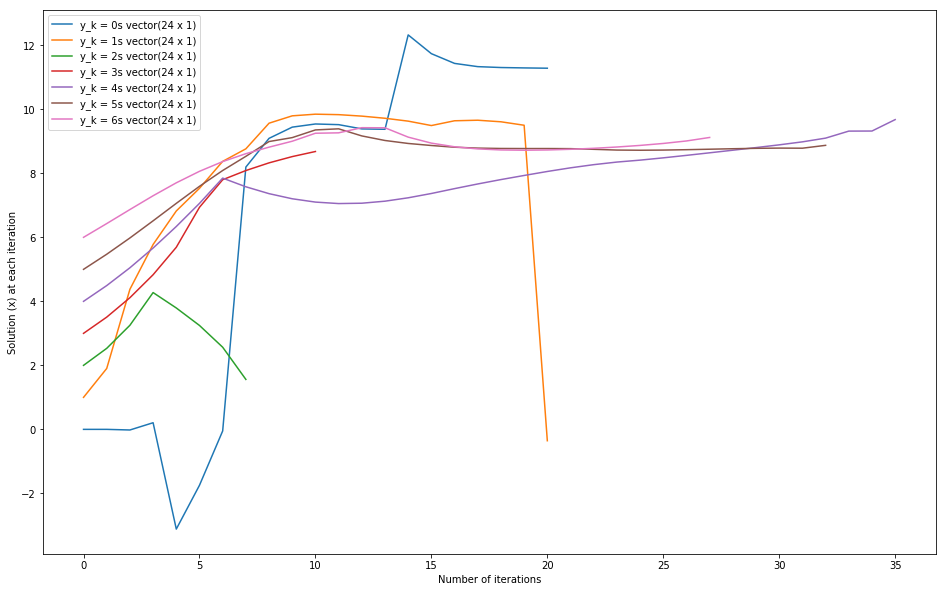

In [28]:
for i in range(7):
    m = 24
    k1, sol1 = newton_nonlinear(np.ones((m,))*i, 0)
    print("{}: Steps to converge: {}".format(i, len(k1)))
    n = sol1.shape[1] - 1
    plt.plot(k1, sol1[:, n], label="y_k = {}s vector({} x {})".format(i, m, 1))
plt.legend()
plt.xlabel("Number of iterations")
plt.ylabel("Solution (x) at each iteration")
plt.show()

In [29]:
sol4[:, 1]

array([  4.        ,   3.9283747 ,   3.76541937,   3.46409878,
         2.93433348,   1.957574  ,  -0.36104043,  16.95537571,
        15.95693219,  14.96103273,  13.97414736,  13.00605186,
        12.08051245,  11.24103246,  10.54212788,  10.00544133,
         9.57244318,   9.46489995,   9.34077499,   9.18013643,
         8.86856291,   8.64717153,   8.5026731 ,   8.44005588,
         8.50697479,   7.90215041,   7.31704835,   6.72307178,
         6.0909229 ,   5.38244603,   4.53388965,   3.41177112,
         1.63960093,  -3.25818216,   0.70924818, -12.2746602 ])

0: Steps to converge: 21
1: Steps to converge: 4
2: Steps to converge: 6
3: Steps to converge: 2
4: Steps to converge: 21
5: Steps to converge: 22
6: Steps to converge: 8


/home/tharangni/Documents/misc/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/home/tharangni/Documents/misc/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


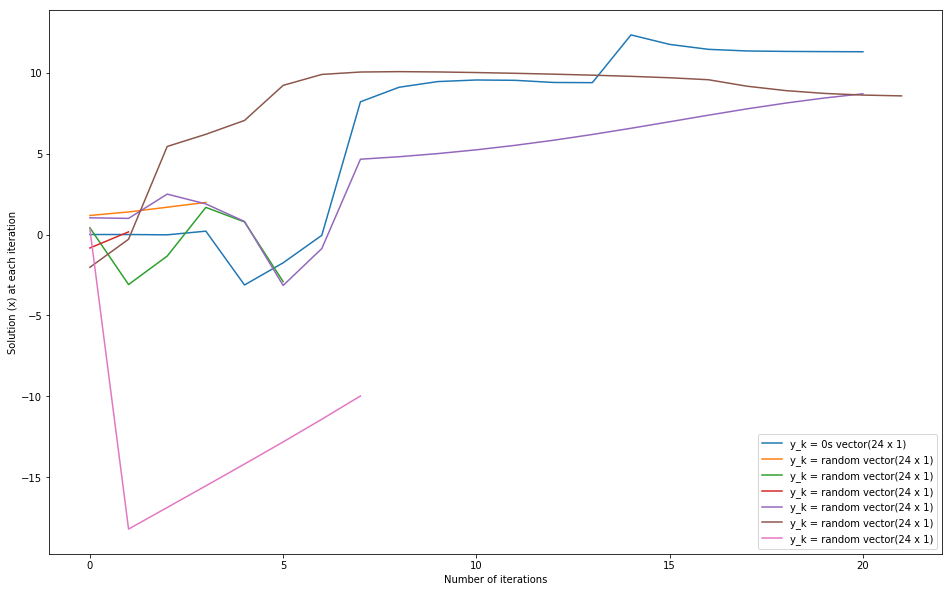

In [30]:
for i in range(7):
    m = 24
    
    if(i==0):
        k1, sol1 = newton_nonlinear(np.ones((m,))*i, 0)
        n = sol1.shape[1] - 1
        plt.plot(k1, sol1[:, n], label="y_k = {}s vector({} x {})".format(i, m, 1))
    else:
        k1, sol1 = newton_nonlinear(np.random.randn(m,1), 0)
        n = sol1.shape[1] - 1
        plt.plot(k1, sol1[:, n], label="y_k = random vector({} x {})".format(m, 1))
    
    print("{}: Steps to converge: {}".format(i, len(k1)))

plt.legend()
plt.xlabel("Number of iterations")
plt.ylabel("Solution (x) at each iteration")
plt.show()

Randomly initialising the starting vector doesn't tell anything about the convergence. 

However, 0 vectors ((24 x 1) vector filled with 0s), 1 vectors ((24 x 1) vector filled with 1s), 2 vectors ((24 x 1) vector filled with 2s) and so on, shed some light into the convergence behaviour. 

It is observed that varying the **vector size** greatly affects the convergence speed. Smaller vectors take a longer time to converge when compared to vectors of size > 10.

Similarly, for different **vector size** different vectors (amongst 0, 1, 2, 3 ..) converge faster. For ex, amongst starting vectors of length 24, a vector initialised with all 2s converges the fastest.